# What topic does the dataset cover?
According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

What can you do with this dataset?
As described above, the original dataset of nearly 300 variables was reduced to just about 20 variables. In addition to classical EDA, this dataset can be used to apply a range of machine learning methods, most notably classifier models (logistic regression, SVM, random forest, etc.). You should treat the variable "HeartDisease" as a binary ("Yes" - respondent had heart disease; "No" - respondent had no heart disease). But note that classes are not balanced, so the classic model application approach is not advisable. Fixing the weights/undersampling should yield significantly betters results. Based on the dataset, I constructed a logistic regression model and embedded it in an application you might be inspired by: https://share.streamlit.io/kamilpytlak/heart-condition-checker/main/app.py. Can you indicate which variables have a significant effect on the likelihood of heart disease?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('/home/vinod/Downloads/heart_2020_cleaned.csv')
data.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


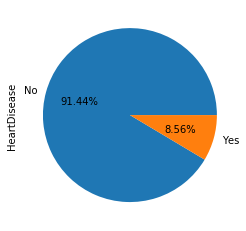

In [5]:
data['HeartDisease'].value_counts().plot.pie(autopct='%1.2f%%')

# Observation
In the dataframe the precentage of heartdisease people is less

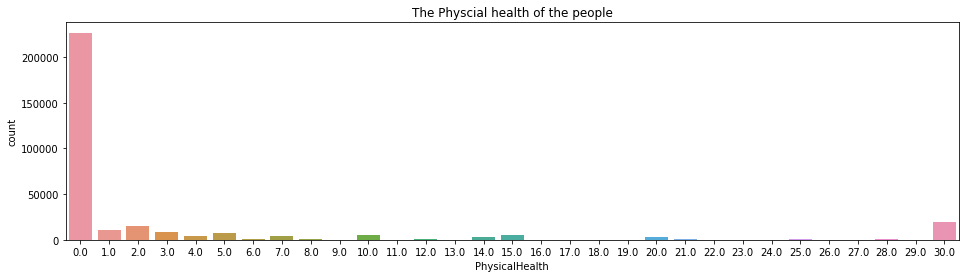

In [6]:
plt.figure(figsize=(16,4))
sns.countplot(data['PhysicalHealth'])
plt.title("The Physcial health of the people")
plt.show()

In [7]:
age_activity=data.groupby(['PhysicalActivity','AgeCategory']).size().reset_index().rename(columns={0:'Ages_with_activity'})

In [8]:
age_activity.head(3)

,PhysicalActivity,AgeCategory,Ages_with_activity
0,No,18-24,3002
1,No,25-29,2617
2,No,30-34,2995


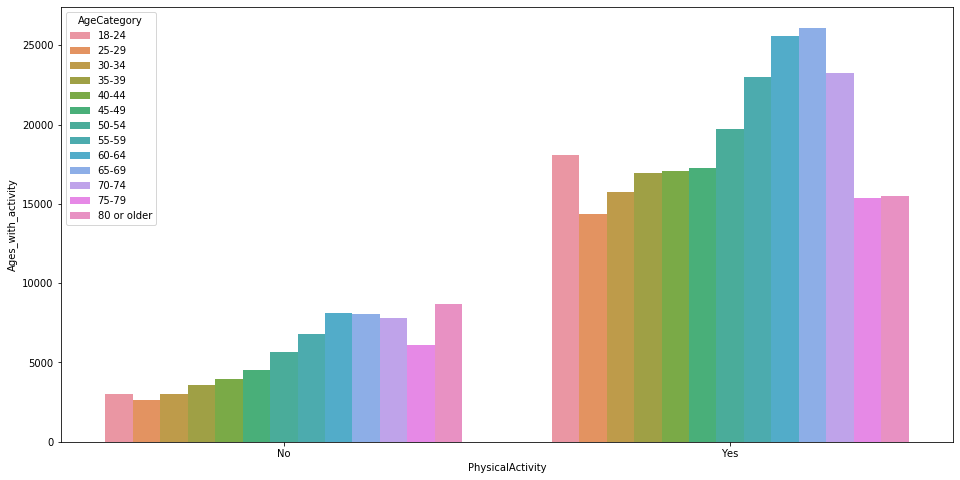

In [9]:
plt.figure(figsize=(16,8))
sns.barplot(x='PhysicalActivity',y='Ages_with_activity',data=age_activity,hue='AgeCategory')

# Observation
1.At the age of 60-64 people must be active at physical activity
2.youger age people 18-24 have low percentage at physical activity

In [10]:
ages_walk=data.groupby(['DiffWalking','AgeCategory']).size().reset_index().rename(columns={0:'Ages_with_walking'})

In [11]:
ages_walk.head()

,DiffWalking,AgeCategory,Ages_with_walking
0,No,18-24,20737
1,No,25-29,16591
2,No,30-34,18166
3,No,35-39,19581
4,No,40-44,19685


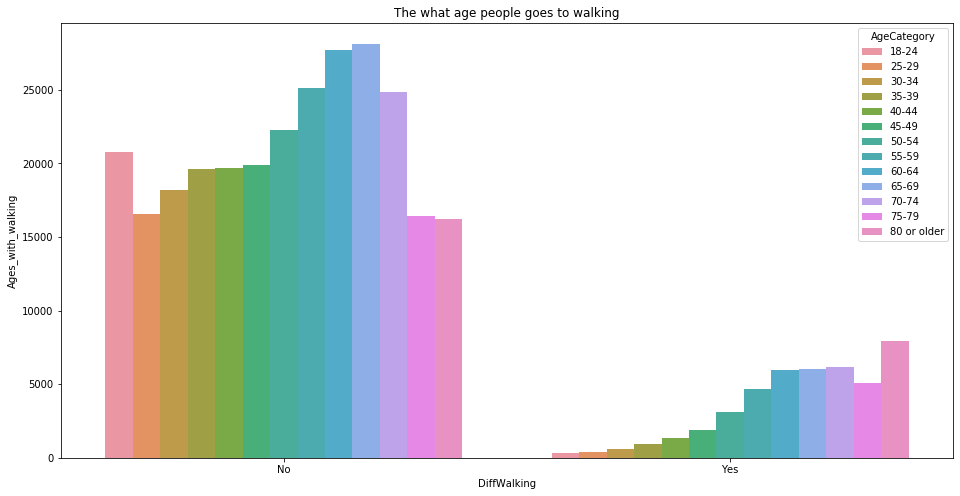

In [12]:
plt.figure(figsize=(16,8))
sns.barplot(x='DiffWalking',y='Ages_with_walking',data=ages_walk,hue='AgeCategory')
plt.title('The what age people goes to walking')
plt.show()

# Observation
Most of the people do not go to the walkings, in the ages between the 80-85 goes the daily walk

In [13]:
age_walk_race=data.groupby(['DiffWalking','AgeCategory','Race']).size().reset_index().rename(columns={0:'Ages_with_walk_race'})

In [14]:
age_walk_race.head()

,DiffWalking,AgeCategory,Race,Ages_with_walk_race
0,No,18-24,American Indian/Alaskan Native,365
1,No,18-24,Asian,1142
2,No,18-24,Black,1528
3,No,18-24,Hispanic,3473
4,No,18-24,Other,1168


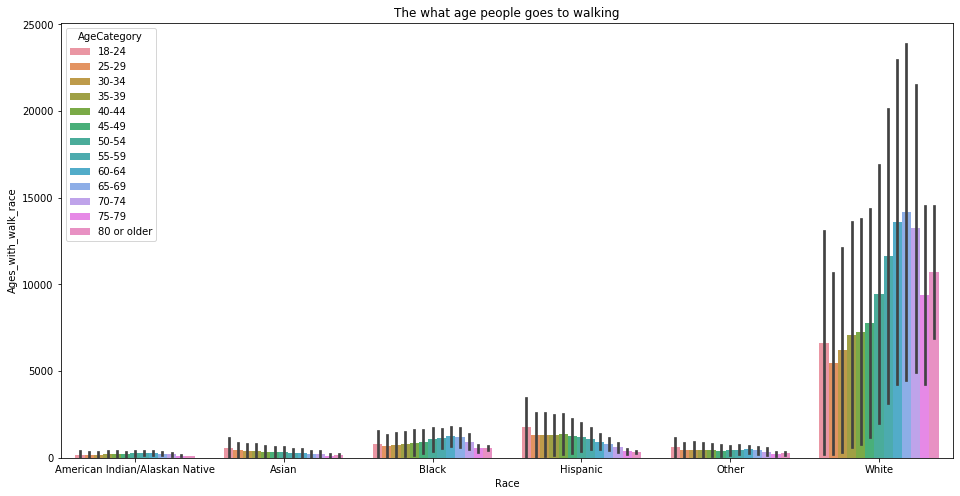

In [15]:
plt.figure(figsize=(16,8))
sns.barplot(x='Race',y='Ages_with_walk_race',data=age_walk_race,hue='AgeCategory')
plt.title('The what age people goes to walking')
plt.show()

# Observation 
From the plot the white peopl at age 60-64 do regular walking

In [16]:
age=data['AgeCategory'].value_counts()

In [17]:
ages_index=data['AgeCategory'].unique()

In [18]:
len(ages_index)

13

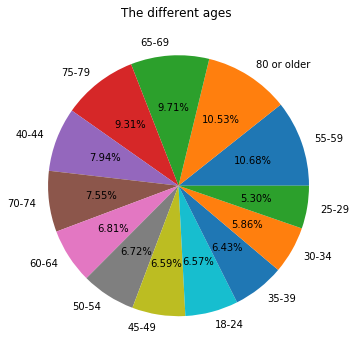

In [19]:
plt.figure(figsize=(14,6))
plt.pie(x=age,labels=ages_index,autopct='%1.2f%%')
plt.title('The different ages ')
plt.show()

# Observations
1.From the above pie chart the highest ages between 55-59
2.The lowest age between 25-29

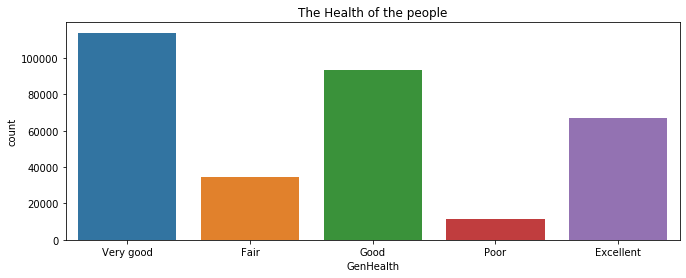

In [20]:
plt.figure(figsize=(11,4))
sns.countplot(data['GenHealth'])
plt.title('The Health of the people')
plt.show()

# Observations
1.We have four types of health in the dataframe
2.Most of the people have very good health after that the "Good health" the second place
3.The less people have poor theire health

In [21]:
race=data['Race'].value_counts()

In [22]:
race

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [23]:
race_label=data['Race'].value_counts().index

In [24]:
race_label

Index(['White', 'Hispanic', 'Black', 'Other', 'Asian',
       'American Indian/Alaskan Native'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7efd11b15e10>,
 [Text(-0.8177183349414112, 0.7357558866231695, 'White'),
  Text(0.40294781406205354, -1.0235394761036885, 'Hispanic'),
  Text(0.8407743180711724, -0.7092944001414048, 'Black'),
  Text(1.0263230761335127, -0.39580417303995685, 'Other'),
  Text(1.0819384459860752, -0.198517503251569, 'Asian'),
  Text(1.098563961018497, -0.056189176460867775, 'American Indian/Alaskan Native')],
 [Text(-0.44602818269531513, 0.401321392703547, '76.68%'),
  Text(0.21978971676112008, -0.5582942596929209, '8.58%'),
  Text(0.45860417349336674, -0.38688785462258435, '7.17%'),
  Text(0.5598125869819159, -0.21589318529452192, '3.42%'),
  Text(0.5901482432651319, -0.1082822745008558, '2.52%'),
  Text(0.5992167060100891, -0.030648641705927872, '1.63%')])

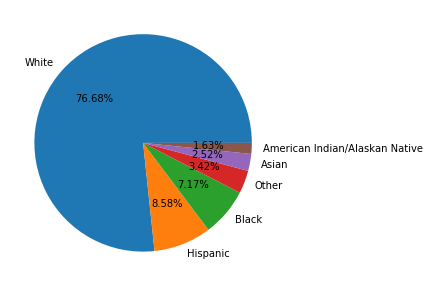

In [25]:
plt.figure(figsize=(16,5))
plt.pie(x=race,labels=race_label,autopct='%1.2f%%')

# Observation:
From the above pie chart we get most of the white preson have in dataset after hispanic, and the least we have the american indain

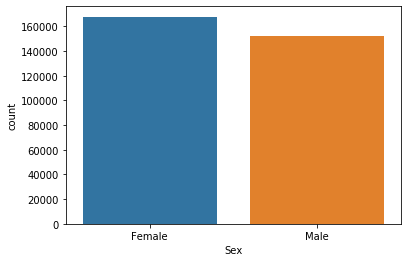

In [26]:

sns.countplot(data['Sex'])

# Observation:
In  the dataset we have female percentage high comapre the male

In [27]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [28]:
races=data.groupby(['Race','AgeCategory']).size().reset_index().rename(columns={0:'Ages_with_races'})

In [29]:
races

,Race,AgeCategory,Ages_with_races
0,American Indian/Alaskan Native,18-24,370
1,American Indian/Alaskan Native,25-29,322
2,American Indian/Alaskan Native,30-34,365
3,American Indian/Alaskan Native,35-39,420
4,American Indian/Alaskan Native,40-44,410
...,...,...,...
73,White,60-64,27182
74,White,65-69,28377
75,White,70-74,26468
76,White,75-79,18740


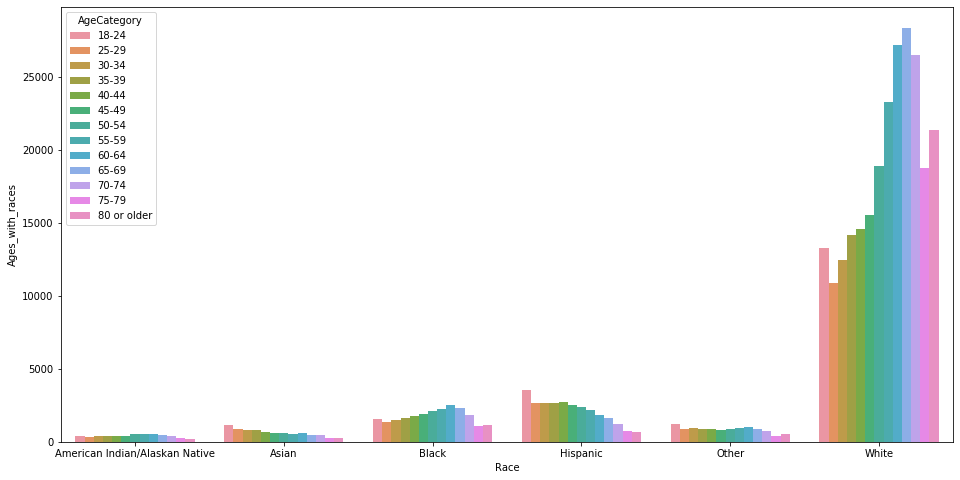

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(x='Race',y='Ages_with_races',data=races,hue='AgeCategory')

# Observation:
1.In the plot we find the ages with race we get the the most of the people in white theire age also high
2.Asian their age with race is low

In [31]:
diabetic=data.groupby(['Race','Diabetic']).size().reset_index().rename(columns={0:'Diabetic_with_Age'})

In [32]:
diabetic

,Race,Diabetic,Diabetic_with_Age
0,American Indian/Alaskan Native,No,3968
1,American Indian/Alaskan Native,"No, borderline diabetes",159
2,American Indian/Alaskan Native,Yes,1021
3,American Indian/Alaskan Native,Yes (during pregnancy),54
4,Asian,No,6850
5,Asian,"No, borderline diabetes",339
6,Asian,Yes,782
7,Asian,Yes (during pregnancy),97
8,Black,No,17684
9,Black,"No, borderline diabetes",627


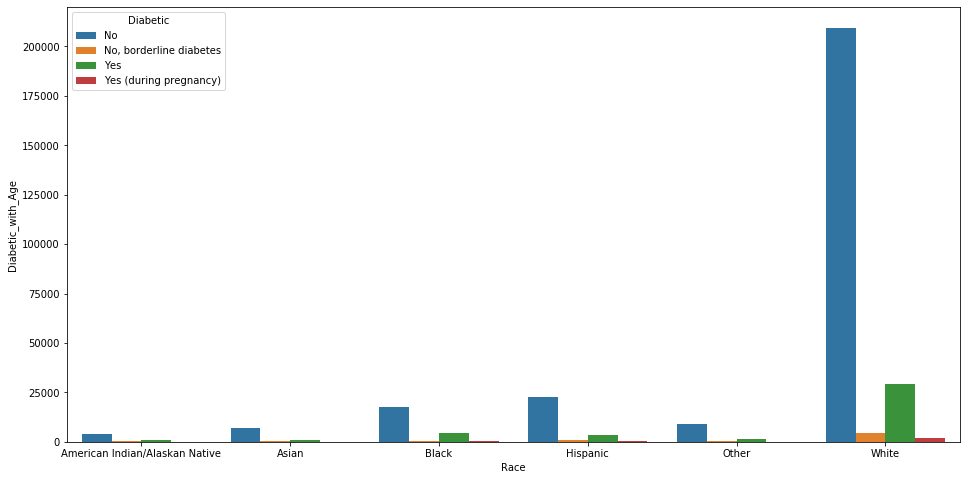

In [33]:
plt.figure(figsize=(16,8))
sns.barplot(x='Race',y='Diabetic_with_Age',data=diabetic,hue='Diabetic')

# Observations
1.The white people have most diabetic
2.the less diabetic peopele in Black,american indain,asian
3.We get the some white people get diabetics with their pregency time

In [34]:
asthma=data.groupby(['Asthma','AgeCategory','Sex']).size().reset_index().rename(columns={0:'Ages_with_Asthma'})

In [35]:
asthma

,Asthma,AgeCategory,Sex,Ages_with_Asthma
0,No,18-24,Female,7608
1,No,18-24,Male,9729
2,No,25-29,Female,6446
3,No,25-29,Male,7641
4,No,30-34,Female,7529
5,No,30-34,Male,8379
6,No,35-39,Female,8750
7,No,35-39,Male,8921
8,No,40-44,Female,9021
9,No,40-44,Male,8920


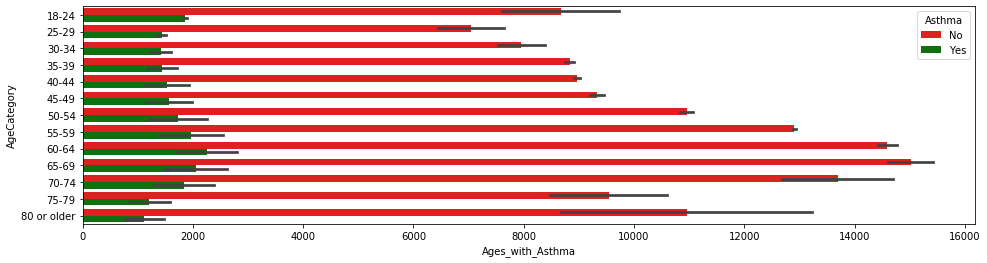

In [36]:
plt.figure(figsize=(16,4))
sns.barplot(y='AgeCategory',x='Ages_with_Asthma',hue='Asthma',data=asthma,palette=['Red','green','blue','yellow'])


# Observation
1.At the age 60-64 people have Asthma patients
2.70-74 age people they are no asthma

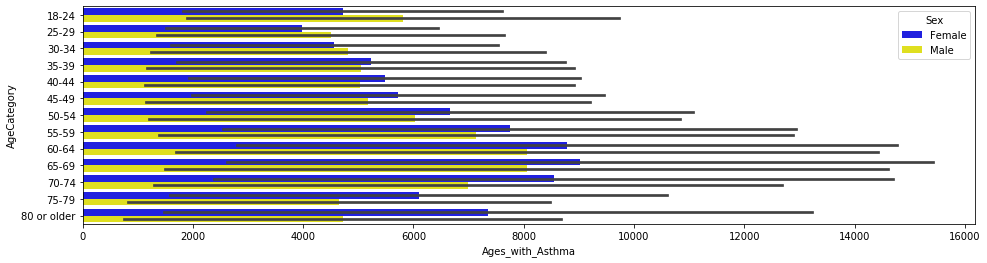

In [37]:
plt.figure(figsize=(16,4))
sns.barplot(y='AgeCategory',x='Ages_with_Asthma',hue='Sex',data=asthma,palette=['blue','yellow'])


# Observation:
1.From the data 65-69 feamale have the asthma 


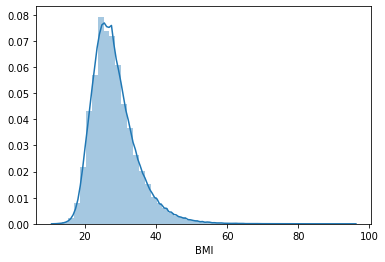

In [38]:
sns.distplot(data['BMI'],hist=True)

In [39]:
female_disease=data[data['Sex']=='Female'].groupby(['KidneyDisease','SkinCancer']).size().reset_index().rename(columns={0:'Skincancer_with_kindneydisease'})

In [40]:
female_disease

,KidneyDisease,SkinCancer,Skincancer_with_kindneydisease
0,No,No,147340
1,No,Yes,14011
2,Yes,No,5442
3,Yes,Yes,1012


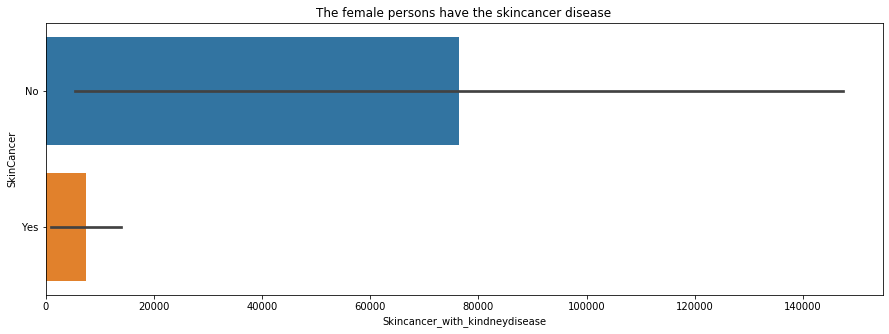

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(y='SkinCancer',x='Skincancer_with_kindneydisease',data=female_disease)
plt.title("The female persons have the skincancer disease")
plt.show()

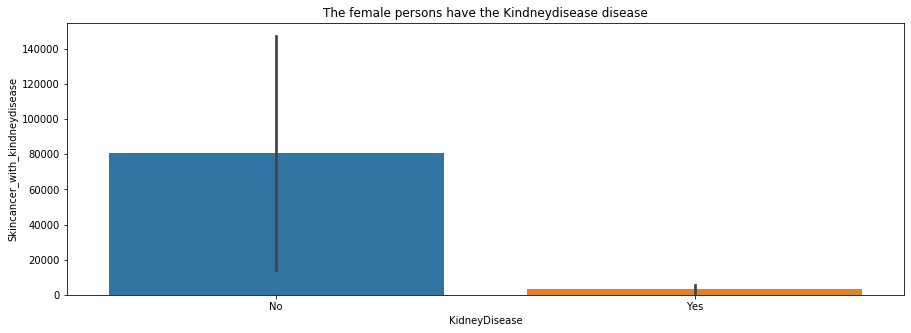

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x='KidneyDisease',y='Skincancer_with_kindneydisease',data=female_disease)
plt.title("The female persons have the Kindneydisease disease")
plt.show()

# Observation
1.From above plots we observed the most of the female suffers with Skincancer and less precentage with suffers kindney disease

In [43]:
smoker_drink=data[data['Sex']=='Female'].groupby(['Smoking','AlcoholDrinking']).size().reset_index().rename(columns={0:'Smoking_and_drinking'})

In [44]:
smoker_drink

,Smoking,AlcoholDrinking,Smoking_and_drinking
0,No,No,100428
1,No,Yes,4848
2,Yes,No,56119
3,Yes,Yes,6410


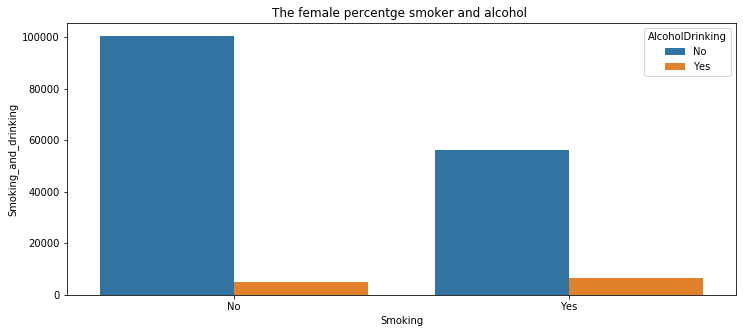

In [45]:
plt.figure(figsize=(12,5))
sns.barplot(x='Smoking',y='Smoking_and_drinking',data=smoker_drink,hue='AlcoholDrinking')
plt.title("The female percentge smoker and alcohol ")
plt.show()

# Observation
1.From the data female candidates smoker less and drinker more

In [46]:
male_smoker=data[data['Sex']=='Male'].groupby(['Smoking','AlcoholDrinking']).size().reset_index().rename(columns={0:'Smoking_and_drinking'})

In [47]:
male_smoker

,Smoking,AlcoholDrinking,Smoking_and_drinking
0,No,No,79097
1,No,Yes,3514
2,Yes,No,62374
3,Yes,Yes,7005


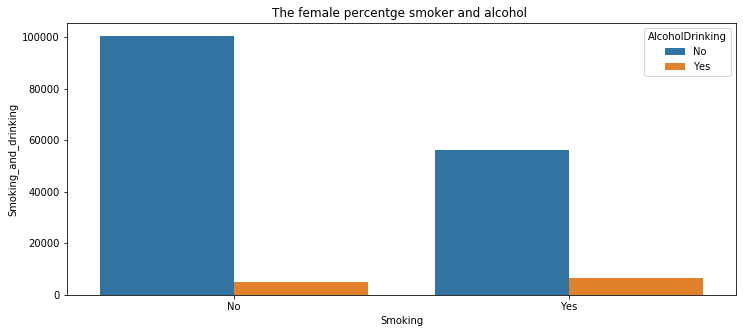

In [48]:
plt.figure(figsize=(12,5))
sns.barplot(x='Smoking',y='Smoking_and_drinking',data=smoker_drink,hue='AlcoholDrinking')
plt.title("The female percentge smoker and alcohol ")
plt.show()

In [49]:
ages_smoker=data.groupby(['AgeCategory','Smoking',]).size().reset_index().rename(columns={0:'differnet_ages_smoker'})

In [50]:
ages_smoker

,AgeCategory,Smoking,differnet_ages_smoker
0,18-24,No,17780
1,18-24,Yes,3284
2,25-29,No,11801
3,25-29,Yes,5154
4,30-34,No,11581
5,30-34,Yes,7172
6,35-39,No,11908
7,35-39,Yes,8642
8,40-44,No,11925
9,40-44,Yes,9081


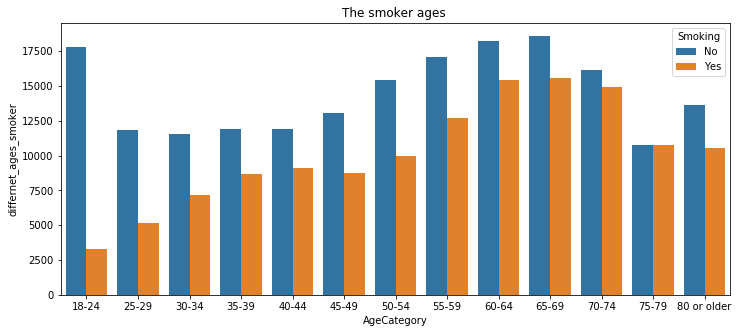

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(x='AgeCategory',y='differnet_ages_smoker',data=ages_smoker,hue='Smoking')
plt.title("The smoker ages ")
plt.show()

# Observation
1.From the above plot we see the maximum ages are smoker in 60-64 and 65-69 these ages are more smokers

In [52]:
ages_drink=data.groupby(['AgeCategory','AlcoholDrinking',]).size().reset_index().rename(columns={0:'differnet_ages_drink'})

In [53]:
ages_drink

,AgeCategory,AlcoholDrinking,differnet_ages_drink
0,18-24,No,19543
1,18-24,Yes,1521
2,25-29,No,15384
3,25-29,Yes,1571
4,30-34,No,17175
5,30-34,Yes,1578
6,35-39,No,18725
7,35-39,Yes,1825
8,40-44,No,19200
9,40-44,Yes,1806


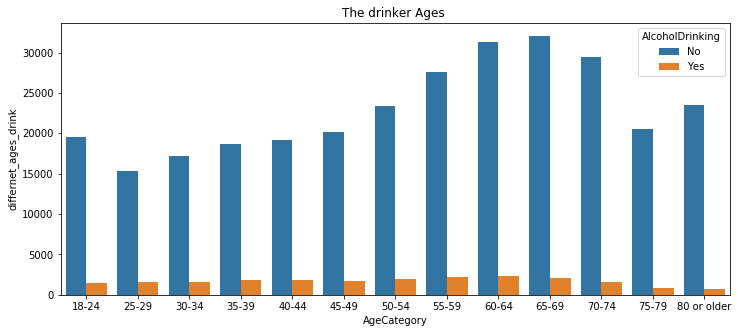

In [54]:
plt.figure(figsize=(12,5))
sns.barplot(x='AgeCategory',y='differnet_ages_drink',data=ages_drink,hue='AlcoholDrinking')
plt.title("The drinker Ages ")
plt.show()

# Observation
1.From the above plot we get 50-54 and 55-59 ages presons are most drinking

In [55]:
ages_heart=data.groupby(['AgeCategory','HeartDisease',]).size().reset_index().rename(columns={0:'differnet_ages_heartdisease'})

In [56]:
ages_heart

,AgeCategory,HeartDisease,differnet_ages_heartdisease
0,18-24,No,20934
1,18-24,Yes,130
2,25-29,No,16822
3,25-29,Yes,133
4,30-34,No,18527
5,30-34,Yes,226
6,35-39,No,20254
7,35-39,Yes,296
8,40-44,No,20520
9,40-44,Yes,486


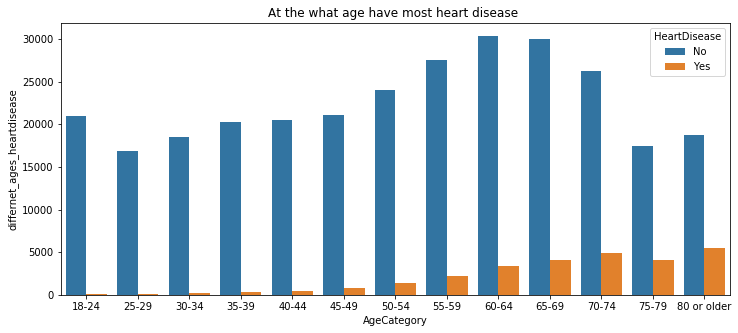

In [57]:
plt.figure(figsize=(12,5))
sns.barplot(x='AgeCategory',y='differnet_ages_heartdisease',data=ages_heart,hue='HeartDisease')
plt.title("At the what age have most heart disease ")
plt.show()

# Observation
1.From the above plot we observe the maximam hear disease in age at 80 or older then after 70-74 ages heartdisease

In [58]:
male_heart=data[data['Sex']=='Male'].groupby(['AgeCategory','HeartDisease']).size().reset_index().rename(columns={0:'male_age_with heart disease'})

In [59]:
male_heart.head(4)

,AgeCategory,HeartDisease,male_age_with heart disease
0,18-24,No,11550
1,18-24,Yes,80
2,25-29,No,8932
3,25-29,Yes,67


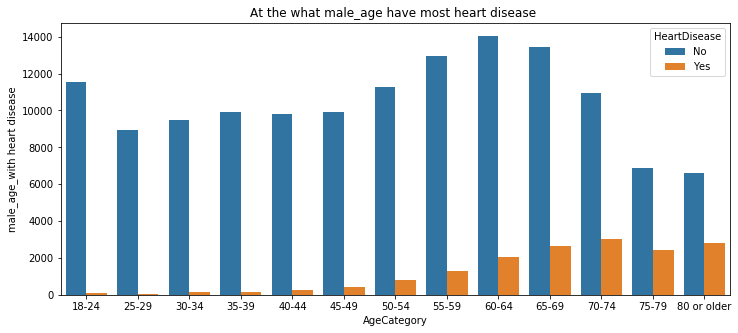

In [60]:
plt.figure(figsize=(12,5))
sns.barplot(x='AgeCategory',y='male_age_with heart disease',data=male_heart,hue='HeartDisease')
plt.title("At the what male_age have most heart disease ")
plt.show()

# Observation
1.From the above plot 70-74 ages of the males have more heartdisease and after 80 or older

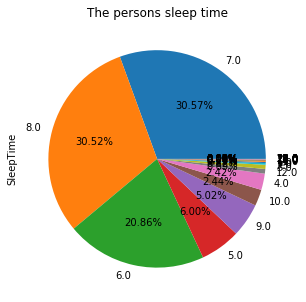

In [61]:
plt.figure(figsize=(16,5))
data['SleepTime'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('The persons sleep time')
plt.show()

# Observation
1.From the observation we get most of the people sleep 7 hours per day and after 8 house per day

In [62]:
health_sleep=data.groupby(['AgeCategory','GenHealth']).size().reset_index().rename(columns={0:'differnet_ages_health'})

In [63]:
health_sleep.head()

,AgeCategory,GenHealth,differnet_ages_health
0,18-24,Excellent,6529
1,18-24,Fair,1124
2,18-24,Good,5078
3,18-24,Poor,148
4,18-24,Very good,8185


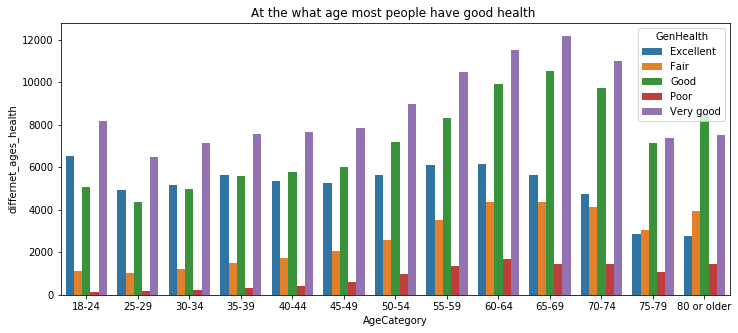

In [64]:
plt.figure(figsize=(12,5))
sns.barplot(x='AgeCategory',y='differnet_ages_health',data=health_sleep,hue='GenHealth')
plt.title("At the what age most people have good health ")
plt.show()

# Observation
1.65-69 ages have the good health
2.18-24 ages have very poor health

In [65]:
data.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


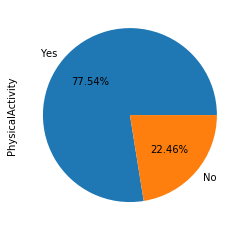

In [66]:
data.PhysicalActivity.value_counts().plot.pie(autopct='%1.2f%%')

In [67]:
data['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [68]:
data['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [69]:
data['Smoking']=data['Smoking'].map({'Yes':1,'No':0})
data['AlcoholDrinking']=data['AlcoholDrinking'].map({'Yes':1,'No':0})
data['Stroke']=data['Stroke'].map({'Yes':1,'No':0})
data['DiffWalking']=data['DiffWalking'].map({'Yes':1,'No':0})
data['Diabetic']=data['Diabetic'].map({'Yes':1,'No':0})
data['Asthma']=data['Asthma'].map({'Yes':1,'No':0})
data['KidneyDisease']=data['KidneyDisease'].map({'Yes':1,'No':0})
data['SkinCancer']=data['SkinCancer'].map({'Yes':1,'No':0})
data['PhysicalActivity']=data['PhysicalActivity'].map({'Yes':1,'No':0})
data['Sex']=data['Sex'].map({'Male':1,'Female':0})
data['Race']=data['Race'].map({'White':5, 'Black':4, 'Asian':3, 'American Indian/Alaskan Native':2,'Other':1, 'Hispanic':0})
data['GenHealth']=data['GenHealth'].map({'Very good':4, 'Fair':3, 'Good':2, 'Poor':1, 'Excellent':0})

In [70]:
data.replace('80 or older','80-85',inplace=True)
data.replace('80 or older','80-85',inplace=True)


In [71]:
data.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,1,0,0,3.0,30.0,0,0,55-59,5,1.0,1,4,5.0,1,0,1
1,No,20.34,0,0,1,0.0,0.0,0,0,80-85,5,0.0,1,4,7.0,0,0,0


In [72]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                  int64
Diabetic            float64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

# To convert the categorical to numerical we use the LabelEncoder in sklearn

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['AgeCategory']=le.fit_transform(data['AgeCategory'])
data['Race']=le.fit_transform(data['Race'])
data['Diabetic']=le.fit_transform(data['Diabetic'])
data['GenHealth']=le.fit_transform(data['GenHealth'])


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

# We divieded the data into train and test in the data i used 25% data to used to test data

In [75]:
X=data.drop(['HeartDisease'],axis=1)
y=data['HeartDisease']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Lets import the logistic regression model for predict the values and find the the model accuracy _score

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [80]:
logist_pred=model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
print('The test score is ',model.score(X_test,y_test))
print('The test score is ',model.score(X_train,y_train))

The test score is  0.9130380399943714
The test score is  0.9152699385543864


In [83]:
print("the accuracy_score is",accuracy_score(y_test,logist_pred))

the accuracy_score is 0.9130380399943714


# So finaly we get 92% accuracy_score of the test data that's great

# Again we use the dicisiontreeclassifier algorithm to our model good for it Let's check it

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dec=DecisionTreeClassifier(criterion='entropy',splitter='random',
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=4,
    min_weight_fraction_leaf=0.5,
    max_features=None,
    random_state=0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=1.5)
dec.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=1.5, criterion='entropy', max_depth=100,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.5, random_state=0,
                       splitter='random')

In [86]:
print('The test score is',dec.score(X_test,y_test))
print('The train score is',dec.score(X_train,y_train))

The test score is 0.9125689895089042
The train score is 0.9148634281336481


In [87]:
dec_pred=dec.predict(X_test)

In [88]:
print("the accuracy_score is",accuracy_score(y_test,dec_pred))

the accuracy_score is 0.9125689895089042


# So finaly we get 92% accuracy_score of the test data that's great

# Again we use the dicisiontreeclassifier algorithm to our model good for it Let's check it

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rfc=RandomForestClassifier(n_estimators=150,
    criterion='entropy',
    max_depth=2,
    min_samples_split=5,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=150, n_jobs=-1)

In [91]:
rfc_pred=rfc.predict(X_test)

In [92]:
print('The test score is',rfc.score(X_test,y_test))
print('The train score is',rfc.score(X_train,y_train))

The test score is 0.9125689895089042
The train score is 0.9148634281336481


In [93]:
print("the accuracy_score is",accuracy_score(y_test,rfc_pred))

the accuracy_score is 0.9125689895089042


# So finaly we get 92% accuracy_score of the test data that's great

# Finally our accuracy_score of the our entire models

In [94]:
print('The logistic model test score is ',model.score(X_test,y_test))
print('The  logistic model train score is ',model.score(X_train,y_train))
print('The decision tree test score is',dec.score(X_test,y_test))
print('The decision tree  train score is',dec.score(X_train,y_train))
print('The random forest test score is',rfc.score(X_test,y_test))
print('The random forest train score is',rfc.score(X_train,y_train))

The logistic model test score is  0.9130380399943714
The  logistic model train score is  0.9152699385543864
The decision tree test score is 0.9125689895089042
The decision tree  train score is 0.9148634281336481
The random forest test score is 0.9125689895089042
The random forest train score is 0.9148634281336481


In [95]:
print("the logistic modelaccuracy_score is",accuracy_score(y_test,logist_pred))
print("the decision tree model accuracy_score is",accuracy_score(y_test,dec_pred))
print("the random forest model accuracy_score is",accuracy_score(y_test,rfc_pred))

the logistic modelaccuracy_score is 0.9130380399943714
the decision tree model accuracy_score is 0.9125689895089042
the random forest model accuracy_score is 0.9125689895089042


# Conculsion
So We finally predict the heart disease with the given features.In the dataset we observe severl things at what age people have drink,what age people smoker wether the female and male ration,how much male and feamale have the asthma at what age and we get alot of answer in the dataset